In [4]:
import pyvista as pv
import os, random
import numpy as np
import miniball
import matplotlib.pyplot as plt

In [49]:
# Load single stl file
stl_dir = '/glade/derecho/scratch/joko/synth-ros/n1000-test-20250226/stl'
id = random.randint(1, 69999)
id = f'{id:06d}'
filename = f'ros-test-{id}.stl'
filepath = os.path.join(stl_dir, filename)
print(f'loading {filepath}')
mesh = pv.read(filepath)
# mesh = pv.examples.download_bunny()
# mesh = pv.Cube()

loading /glade/derecho/scratch/joko/synth-ros/n1000-test-20250226/stl/ros-test-027456.stl


In [6]:
# set base output directory
output_base = '/glade/derecho/scratch/joko/synth-ros/test-stereo-projections'

# Method 1: Rotate Mesh

In [51]:
mesh.center

[-6.796073913574219, 6.313880920410156, -2.7538375854492188]

In [50]:
def get_orthogonal_vector(v):
    '''
    Return an arbitrary orthogonal vector to v
    '''    
    arbitrary_vector = np.array([1, 0, 0])
    v_orth = np.cross(v, arbitrary_vector)
    # If v1 and arbitrary_vector are parallel, you could end up with a zero vector, 
    # in which case you'd need to choose a different arbitrary vector. Let's check:
    if np.all(v_orth == 0):
        arbitrary_vector = np.array([0, 1, 0]) # set to another arbitrary vector (e.g., [0, 1, 0])
        v_orth = np.cross(v1, arbitrary_vector)
    # Normalize the orthogonal vector v2
    v_orth = v_orth / np.linalg.norm(v_orth)
    return v_orth

In [52]:
# set paths 
output_dir = os.path.join(output_base, 'method1-rotate-mesh-v2')
os.makedirs(output_dir, exist_ok=True)
path_default = os.path.join(output_dir, 'default.png')
path_2ds = os.path.join(output_dir, '2ds.png')
path_phips = os.path.join(output_dir, 'phips.png')
# initiate plotter and settings
theta = 90 # angle between two views
proj_id = 1 # projection id
res=224
bg_color='black'
obj_color='white'
op=1.0
pl = pv.Plotter(off_screen=True, window_size=[res, res])
pl.background_color = bg_color
pl.enable_parallel_projection()
pl.remove_all_lights()
# default view
actor_default = pl.add_mesh(mesh, show_edges=None, color = obj_color, opacity=op)
# pl.camera.focal_point = [0,0,0] # look at origin
# pl.camera.position = [pl.camera.distance, 0, 0] # move camera on x-axis, maintain same distance
pl.render()
pl.screenshot(path_default, return_img=False)
# 2ds view (90 degs)
axis = get_orthogonal_vector(pl.camera.position) # rotate around axis that is orthogonal to camera view
theta_2ds = 90  # Rotate theta degrees
mesh_2ds = mesh.rotate_vector(axis, theta_2ds, point=mesh.center)  # Rotate about mesh center
actor_2ds = pl.add_mesh(mesh_2ds, show_edges=None, color = obj_color, opacity=op)
pl.remove_actor(actor_default) # remove default mesh 
pl.render()
pl.screenshot(path_2ds, return_img=False)
# phips view (120 degs)
theta_phips = 120
mesh_phips = mesh.rotate_vector(axis, theta_phips, point=mesh.center)
pl.add_mesh(mesh_phips, show_edges=None, color = obj_color, opacity=op)
pl.remove_actor(actor_2ds) # remove default mesh 
pl.render()
pl.screenshot(path_phips, return_img=False)

In [ ]:
# Given vector v1 (it should be a 3D vector)
v1 = np.array([1, 2, 3])

# Given point P on the vector v2 (assume a point P = [px, py, pz])
P = np.array([4, 5, 6])

# Choose an arbitrary vector not parallel to v1 (for example, the x-axis direction if v1 isn't aligned with it)
# We are assuming that v1 is not parallel to [1, 0, 0], but if it is, you can use another vector, e.g., [0, 1, 0].
arbitrary_vector = np.array([1, 0, 0])

# Compute the cross product of v1 and arbitrary_vector to get a vector orthogonal to v1
v2 = np.cross(v1, arbitrary_vector)

# If v1 and arbitrary_vector are parallel, you could end up with a zero vector, 
# in which case you'd need to choose a different arbitrary vector. Let's check:
if np.all(v2 == 0):
    # Try another arbitrary vector (e.g., [0, 1, 0])
    arbitrary_vector = np.array([0, 1, 0])
    v2 = np.cross(v1, arbitrary_vector)

# Normalize the orthogonal vector v2
v2 = v2 / np.linalg.norm(v2)

# Method 2: Move Camera

# 2D-S

- orthogonal (90 deg) between two views
- source: https://www.arm.gov/publications/tech_reports/handbooks/doe-sc-arm-tr-233.pdf

In [45]:
mesh1.center

[-27.327178955078125, 11.90142822265625, -35.160888671875]

In [46]:
theta = 90 # angle between two views
proj_id = 1 # projection id
res=128
bg_color='black'
obj_color='white'
op=1.0
pl1 = pv.Plotter(off_screen=True, window_size=[res, res])
pl1.background_color = bg_color
pl1.enable_parallel_projection()
pl1.remove_all_lights()
pl1.add_mesh(mesh1, show_edges=None, color = obj_color, opacity=op, name='mesh')
print(pl1.camera)

vtkOpenGLCamera (0x556c200baf80)
  Debug: Off
  Modified Time: 184819
  Reference Count: 2
  Registered Events: (none)
  ClippingRange: (1054.97, 3663.6)
  DirectionOfProjection: (-0.57735, -0.57735, -0.57735)
  Distance: 2207.49
  EyeAngle: 2
  FocalDisk: 1
  FocalDistance: 0
  FocalPoint: (-27.3272, 11.9014, -35.1609)
  ViewShear: (0, 0, 1)
  ParallelProjection: On
  ParallelScale: 571.341
  Position: (1247.17, 1286.4, 1239.33)
  Stereo: Off
  Left Eye: 1
  Thickness: 2608.63
  ViewAngle: 30
  UseHorizontalViewAngle: 0
  UserTransform: (none)
(none)
  FreezeFocalPoint: (none)
  ViewPlaneNormal: (0.57735, 0.57735, 0.57735)
  ViewUp: (0, 0, 1)
  WindowCenter: (0, 0)
  UseOffAxisProjection: (0)
  ScreenBottomLeft: (-0.5, -0.5, -0.5)
  ScreenBottomRight: (0.5, -0.5, -0.5)
  ScreenTopRight: (0.5, 0.5, -0.5)
  ScreenCenter: (0, 0, -0.5)
  OffAxisClippingAdjustment: (0)
  EyeSeparation: (0.06)
  ProjectionPlaneOrientationMatrix: (none  )
  EyeTransformMatrix: (0x556c20932980
    Debug: Off


In [123]:
# get randome stereo views of crystal
print(f'processing {filename}')
theta = 90 # angle between two views
proj_id = 1 # projection id
res=128
bg_color='black'
obj_color='white'
op=1.0
def random_rotate(mesh):
    """
    Rotate rosette in a random orientation
    TODO:
    - fix bug related to the reliance on model attribute
    """
    rotated = mesh.copy()
    deg_x = np.random.randint(1, 360)
    deg_y = np.random.randint(1, 360)
    deg_z = np.random.randint(1, 360)
    rotated_model = rotated.rotate_x(deg_x, inplace=False)
    rotated_model.rotate_y(deg_y, inplace=True)
    rotated_model.rotate_z(deg_z, inplace=True)
    return rotated_model
# Rotate randomly N times
N = 10
for i in range(N):
    print(f'-> random rotation {proj_id}')
    # first, randomly rotate 
    mesh2 = random_rotate(mesh1)
    # second, rotate theta degrees, about some set axis (z-axis)
    axis = np.array([0, 0, 1])  # Example: rotation around the diagonal of XY-plane
    theta = 90  # Rotate theta degrees
    mesh3 = mesh2.rotate_vector(axis, theta, point=(0, 0, 0))  # Rotate about the origin
    # save stereo projections
    save_dir = os.path.join(output_base, '2ds')
    view1_filename = f'ros-proj-{id}-{proj_id:03d}-1.png'
    view1_path = os.path.join(save_dir, view1_filename)                          
    view2_filename = f'ros-proj-{id}-{proj_id:03d}-2.png'
    view2_path = os.path.join(save_dir, view2_filename)
    pl1 = pv.Plotter(off_screen=True, window_size=[res, res])
    pl1.background_color = bg_color
    pl1.enable_parallel_projection()
    pl1.remove_all_lights()
    pl1.add_mesh(mesh2, show_edges=None, color = obj_color, opacity=op, name='mesh')
    pl1.screenshot(view1_path, return_img=False)
    pl2 = pv.Plotter(off_screen=True, window_size=[res, res])
    pl2.background_color = bg_color
    pl2.enable_parallel_projection()
    pl2.remove_all_lights()
    pl2.add_mesh(mesh3, show_edges=None, color = obj_color, opacity=op, name='mesh')
    pl2.screenshot(view2_path, return_img=False)
    proj_id += 1

processing ros-test-023938.stl
-> random rotation 1
-> random rotation 2
-> random rotation 3
-> random rotation 4
-> random rotation 5
-> random rotation 6
-> random rotation 7
-> random rotation 8
-> random rotation 9
-> random rotation 10


# PHIPS-HALO

- 120 deg between two views
- source: https://amt.copernicus.org/articles/14/3049/2021/

In [127]:
# get randome stereo views of crystal
print(f'processing {filename}')
theta = 120 # angle between two views
proj_id = 1 # projection id
res=128
bg_color='black'
obj_color='white'
op=1.0
def random_rotate(mesh):
    """
    Rotate rosette in a random orientation
    TODO:
    - fix bug related to the reliance on model attribute
    """
    rotated = mesh.copy()
    deg_x = np.random.randint(1, 360)
    deg_y = np.random.randint(1, 360)
    deg_z = np.random.randint(1, 360)
    rotated_model = rotated.rotate_x(deg_x, inplace=False)
    rotated_model.rotate_y(deg_y, inplace=True)
    rotated_model.rotate_z(deg_z, inplace=True)
    return rotated_model
# Rotate randomly N times
N = 10
for i in range(N):
    print(f'-> random rotation {proj_id}')
    # first, randomly rotate 
    mesh2 = random_rotate(mesh1)
    # second, rotate theta degrees, about some set axis (z-axis)
    axis = np.array([0, 0, 1])  # Example: rotation around the diagonal of XY-plane
    mesh3 = mesh2.rotate_vector(axis, theta, point=(0, 0, 0))  # Rotate about the origin
    # save stereo projections
    save_dir = os.path.join(output_base, 'phips')
    view1_filename = f'ros-proj-{id}-{proj_id:03d}-1.png'
    view1_path = os.path.join(save_dir, view1_filename)                          
    view2_filename = f'ros-proj-{id}-{proj_id:03d}-2.png'
    view2_path = os.path.join(save_dir, view2_filename)
    pl1 = pv.Plotter(off_screen=True, window_size=[res, res])
    pl1.background_color = bg_color
    pl1.enable_parallel_projection()
    pl1.remove_all_lights()
    pl1.add_mesh(mesh2, show_edges=None, color = obj_color, opacity=op, name='mesh')
    pl1.screenshot(view1_path, return_img=False)
    pl2 = pv.Plotter(off_screen=True, window_size=[res, res])
    pl2.background_color = bg_color
    pl2.enable_parallel_projection()
    pl2.remove_all_lights()
    pl2.add_mesh(mesh3, show_edges=None, color = obj_color, opacity=op, name='mesh')
    pl2.screenshot(view2_path, return_img=False)
    proj_id += 1

processing ros-test-023938.stl
-> random rotation 1
-> random rotation 2
-> random rotation 3
-> random rotation 4
-> random rotation 5
-> random rotation 6
-> random rotation 7
-> random rotation 8
-> random rotation 9
-> random rotation 10


# Test: multi-projections from stl

In [172]:
import pyvista as pv
import os, sys
import random
import numpy as np
import json

In [173]:
# get small test batch of stl files
n_proj = 10
# set directories
save_dir = '/glade/u/home/joko/ice3d/output/test-multi-projections'
os.makedirs(save_dir, exist_ok=True)
# Load the JSON file
params_path = '/glade/u/home/joko/ice3d/output/params_200_50.json'
with open(params_path, 'rb') as file:
    params = json.load(file)
# load list of STL filepaths
stl_paths_txt = '/glade/derecho/scratch/joko/synth-ros/params_200_50-debug-20250316/stl/stl_relative_paths.txt'
with open(stl_paths_txt, 'r') as file:
    basepath = '/glade/derecho/scratch/joko/synth-ros/params_200_50-debug-20250316/stl'
    rel_paths = [line.strip().replace('./','') for line in file]
    stl_paths = [os.path.join(basepath, i) for i in rel_paths]
stl_paths = random.sample(stl_paths, 100)

In [174]:
def random_rotate(mesh):
    rotated = mesh.copy()
    deg_x = np.random.randint(1, 360)
    deg_y = np.random.randint(1, 360)
    deg_z = np.random.randint(1, 360)
    rotated.rotate_x(deg_x, inplace=True)
    rotated.rotate_y(deg_y, inplace=True)
    rotated.rotate_z(deg_z, inplace=True)
    return rotated
def process_instance(stl_path, save_dir, n_proj, params):
    # projection parameters 
    res = 128
    bg_color='white'
    obj_color='black'
    op=1.0
    mesh = pv.read(stl_path) # read stl file as mesh
    id = stl_path.rsplit('-',1)[1].rsplit('.',1)[0] # get id as string
    n_arms = params[int(id)][0][5]
    save_folder = os.path.join(save_dir, str(n_arms))
    os.makedirs(save_folder, exist_ok=True)
    for i in range(n_proj):
        # initiate plotter
        pl = pv.Plotter(off_screen=True, window_size=[res, res])
        pl.background_color = bg_color
        pl.enable_parallel_projection()
        pl.remove_all_lights()
        # x-y projection
        rotated_mesh = random_rotate(mesh)
        pl.add_mesh(rotated_mesh, show_edges=None, color = obj_color, opacity=op, name='mesh')
        pl.camera.focal_point = [0,0,0]
        pl.camera.position = [pl.camera.distance, 0, 0]
        camera_position_default = pl.camera.position
        name_default = f'ros-projection-{id}-{i:03d}-default.png'
        folder_default = os.path.join(save_folder, 'default')
        os.makedirs(folder_default, exist_ok=True)
        path_default = os.path.join(folder_default, name_default)
        pl.render()
        pl.screenshot(path_default, return_img=False)
        # 2D-S (90deg), second view
        pl.camera.azimuth=90.0 
        name_2ds = f'ros-projection-{id}-{i:03d}-2ds.png'
        folder_2ds = os.path.join(save_folder, '2ds')
        os.makedirs(folder_2ds, exist_ok=True)
        path_2ds = os.path.join(folder_2ds, name_2ds)
        pl.render()
        pl.screenshot(path_2ds, return_img=False)
        # reset camera
        pl.camera.position = camera_default_position 
        # PHIPS-HALO (120deg), second view
        pl.camera.azimuth=120.0
        name_phips = f'ros-projection-{id}-{i:03d}-phips.png'
        folder_phips = os.path.join(save_folder, 'phips')
        os.makedirs(folder_phips, exist_ok=True)
        path_phips = os.path.join(folder_phips, name_phips)
        pl.render()
        pl.screenshot(path_phips, return_img=False)
        pl.close()

In [175]:
# process stl files iteratively
for stl in stl_paths:
    process_instance(stl, save_dir, n_proj, params)

In [153]:
stl_path = stl_paths[0]
res = 128
bg_color='white'
obj_color='black'
op=1.0
mesh = pv.read(stl_path) # read stl file as mesh
pl = pv.Plotter(off_screen=True, window_size=[res, res])
pl.background_color = bg_color
pl.enable_parallel_projection()
pl.remove_all_lights()
# pl.camera_position = 'xy'  # Set static camera view
# x-y projection
rotated_mesh = random_rotate(mesh)
pl.add_mesh(mesh, show_edges=None, color=obj_color, opacity=op)
pl.render()
filepath = os.path.join(save_dir, 'view1.png')
pl.screenshot(filepath, return_img=False)
print(pl.camera.position)

(1034.2642917114233, 967.4868258911108, 986.2546176391577)


In [154]:
pl.camera.focal_point = [0,0,0]
pl.render()
filepath = os.path.join(save_dir, 'view2.png')
pl.screenshot(filepath, return_img=False)
print(pl.camera.position)

(1034.2642917114233, 967.4868258911108, 986.2546176391577)


In [159]:
pl.camera.distance

1725.8133022423804

In [155]:
# Compute the current distance from the focal point
current_position = pl.camera.position
current_focal_point = pl.camera.focal_point
distance = np.linalg.norm(np.array(current_position) - np.array(current_focal_point))
# Set the camera to the 'xy' view but maintain the distance
# In the 'xy' plane, the camera position will be along the z-axis
# new_position = [distance, 0, 0] 
new_position = [pl.camera.distance, 0, 0]
print(new_position)
pl.camera.position = new_position
pl.render()
filepath = os.path.join(save_dir, 'view3.png')
pl.screenshot(filepath, return_img=False)
print(pl.camera.position)
camera_default_position = pl.camera.position

[np.float64(1725.8133022423804), 0, 0]
(1725.8133022423804, 0.0, 0.0)


In [156]:
# 2ds (90 deg)
pl.camera.azimuth=90.0 
pl.render()
filepath = os.path.join(save_dir, 'view4.png')
pl.screenshot(filepath, return_img=False)
print(pl.camera.position)

(3.83207532870773e-13, 1725.8133022423804, 0.0)


In [157]:
# reset (rotate back)
pl.camera.position = camera_default_position # reset to default
pl.render()
filepath = os.path.join(save_dir, 'view5.png')
pl.screenshot(filepath, return_img=False)
print(pl.camera.position)

(1725.8133022423804, 0.0, 0.0)


In [158]:
# phips (120 deg)
pl.camera.azimuth=120.0 
pl.render()
filepath = os.path.join(save_dir, 'view6.png')
pl.screenshot(filepath, return_img=False)
print(pl.camera.position)

(-862.9066511211898, 1494.5981619310132, 0.0)


In [137]:
print(pl.camera)

vtkOpenGLCamera (0x5555b6aeccc0)
  Debug: Off
  Modified Time: 1003587
  Reference Count: 2
  Registered Events: (none)
  ClippingRange: (1156.61, 2293.24)
  DirectionOfProjection: (-1, 0, 0)
  Distance: 1725.81
  EyeAngle: 2
  FocalDisk: 1
  FocalDistance: 0
  FocalPoint: (0, 0, 0)
  ViewShear: (0, 0, 1)
  ParallelProjection: On
  ParallelScale: 433.268
  Position: (1725.81, 0, 0)
  Stereo: Off
  Left Eye: 1
  Thickness: 1136.63
  ViewAngle: 30
  UseHorizontalViewAngle: 0
  UserTransform: (none)
(none)
  FreezeFocalPoint: (none)
  ViewPlaneNormal: (1, -0, -0)
  ViewUp: (0, 0, 1)
  WindowCenter: (0, 0)
  UseOffAxisProjection: (0)
  ScreenBottomLeft: (-0.5, -0.5, -0.5)
  ScreenBottomRight: (0.5, -0.5, -0.5)
  ScreenTopRight: (0.5, 0.5, -0.5)
  ScreenCenter: (0, 0, -0.5)
  OffAxisClippingAdjustment: (0)
  EyeSeparation: (0.06)
  ProjectionPlaneOrientationMatrix: (none  )
  EyeTransformMatrix: (0x5555b7266790
    Debug: Off
    Modified Time: 999538
    Reference Count: 1
    Registered E

In [ ]:
# projection parameters 
res = 128
bg_color='black'
obj_color='white'
op=1.0
mesh = pv.read(stl_path) # read stl file as mesh
id = stl_path.rsplit('-',1)[1].rsplit('.',1)[0] # get id as string
n_arms = params[int(id)][0][5]
save_folder = os.path.join(save_dir, str(n_arms))
os.makedirs(save_folder, exist_ok=True)
pl = pv.Plotter(off_screen=True, window_size=[res, res])
pl.background_color = bg_color
pl.enable_parallel_projection()
pl.remove_all_lights()
pl.camera_position = 'xy'  # Set static camera view
# x-y projection
rotated_mesh = random_rotate(mesh)
pl.add_mesh(rotated_mesh, show_edges=None, color = obj_color, opacity=op, name='mesh')
name_default = f'ros-projection-{id}-{i:03d}-default.png'
folder_default = os.path.join(save_folder, 'default')
os.makedirs(folder_default, exist_ok=True)
path_default = os.path.join(folder_default, name_default)
pl.screenshot(path_default, return_img=False)

# Scratch

In [39]:
# import pyvista as pv
mesh = pv.Cube()
rot = mesh.rotate_vector((0, 0, 1), 60, point=(0,0,0),inplace=False)

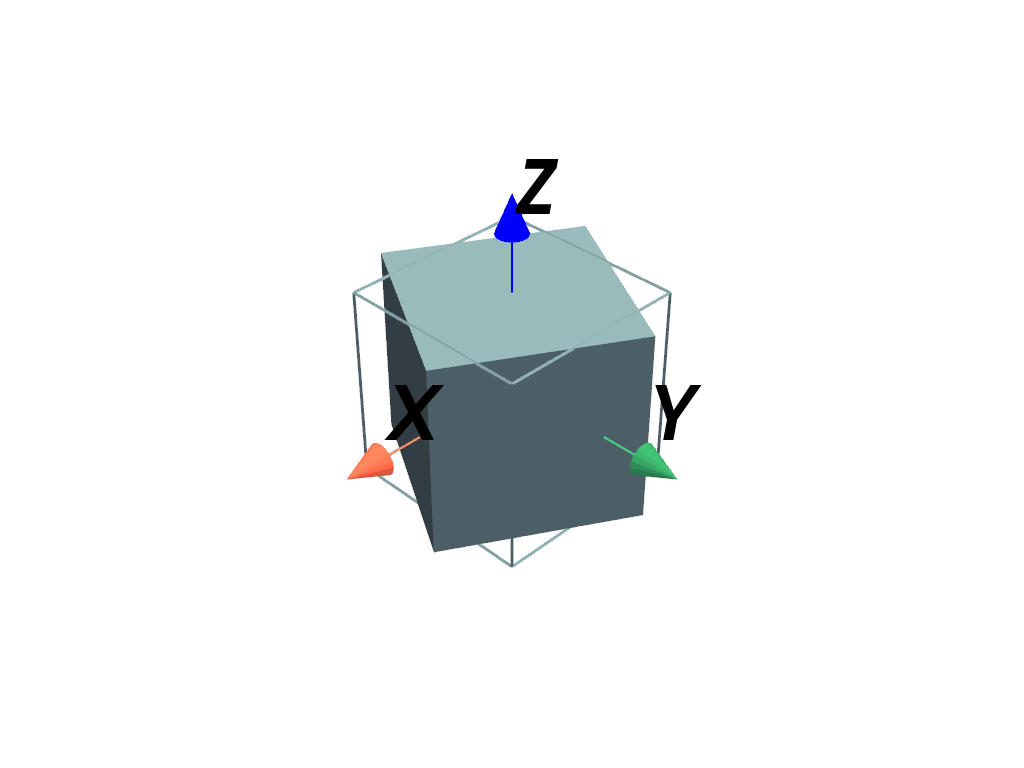

In [40]:
pl = pv.Plotter()
_ = pl.add_mesh(rot)
_ = pl.add_mesh(mesh, style='wireframe', line_width=3)
_ = pl.add_axes_at_origin()
pl.show(jupyter_backend='static')

In [64]:
# Load single stl file
stl_dir = '/glade/derecho/scratch/joko/synth-ros/n1000-test-20250226/stl'
id = random.randint(1, 69999)
id = f'{id:06d}'
filename = f'ros-test-{id}.stl'
mesh = pv.read(os.path.join(stl_dir, filename))
# mesh = pv.Cube()
pl = pv.Plotter(off_screen=True)  # Off-screen rendering
pl.add_mesh(mesh, color="lightblue", show_edges=False)
pl.camera_position = 'xy'  # Set static camera view
pl.add_axes()
origin = [0, 0, 0]  # The origin (0, 0, 0)
# # Create arrows along the X, Y, and Z axes
# x_arrow = pv.Arrow(start=origin, direction=(1, 0, 0), scale=2)  # X axis, scaled by 2
# y_arrow = pv.Arrow(start=origin, direction=(0, 1, 0), scale=2)  # Y axis, scaled by 2
# z_arrow = pv.Arrow(start=origin, direction=(0, 0, 1), scale=2)  # Z axis, scaled by 2
# # Add arrows (axis vectors) to the plot with different colors
# pl.add_mesh(x_arrow, color="red", label="X-axis")
# pl.add_mesh(y_arrow, color="green", label="Y-axis")
# pl.add_mesh(z_arrow, color="blue", label="Z-axis")
# pl.show(jupyter_backend='static')
camera = pl.camera
print("Camera Position:", camera.position)
print("Camera Focal Point:", camera.focal_point)
print("Camera Elevation:", camera.elevation)
print("Camera Azimuth:", camera.azimuth)
pl.render()
pl.screenshot('view-default-1.png', return_img=False)

Camera Position: (95.82309341430664, -57.55024719238281, 1201.1071411676937)
Camera Focal Point: (95.82309341430664, -57.55024719238281, -38.33238220214844)
Camera Elevation: 0.0
Camera Azimuth: 0.0


In [65]:
pl.camera.azimuth = 90.0
# pl.show(jupyter_backend='static')
camera = pl.camera
print("Camera Position:", camera.position)
print("Camera Focal Point:", camera.focal_point)
print("Camera Elevation:", camera.elevation)
print("Camera Azimuth:", camera.azimuth)
pl.render()
pl.screenshot('view-90.png', return_img=False)

Camera Position: (1335.2626167841488, -57.55024719238281, -38.33238220214815)
Camera Focal Point: (95.82309341430664, -57.55024719238281, -38.33238220214844)
Camera Elevation: 0.0
Camera Azimuth: 90.0


In [66]:
pl.reset_camera()
pl.camera_position = 'xy'  # Set static camera view
camera = pl.camera
# pl.show(jupyter_backend='static')
print("Camera Position:", camera.position)
print("Camera Focal Point:", camera.focal_point)
print("Camera Elevation:", camera.elevation)
print("Camera Azimuth:", camera.azimuth)
pl.screenshot('view-default-2.png', return_img=False)

Camera Position: (95.82309341430664, -57.55024719238281, 1201.1071411676937)
Camera Focal Point: (95.82309341430664, -57.55024719238281, -38.33238220214844)
Camera Elevation: 0.0
Camera Azimuth: 0.0


In [67]:
pl.camera.azimuth = 120.0
# pl.show(jupyter_backend='static')
camera = pl.camera
print("Camera Position:", camera.position)
print("Camera Focal Point:", camera.focal_point)
print("Camera Elevation:", camera.elevation)
print("Camera Azimuth:", camera.azimuth)
pl.render()
pl.screenshot('view-120.png', return_img=False)

Camera Position: (1169.2092071070665, -57.55024719238281, -658.0521438870693)
Camera Focal Point: (95.82309341430664, -57.55024719238281, -38.33238220214844)
Camera Elevation: 0.0
Camera Azimuth: 120.0


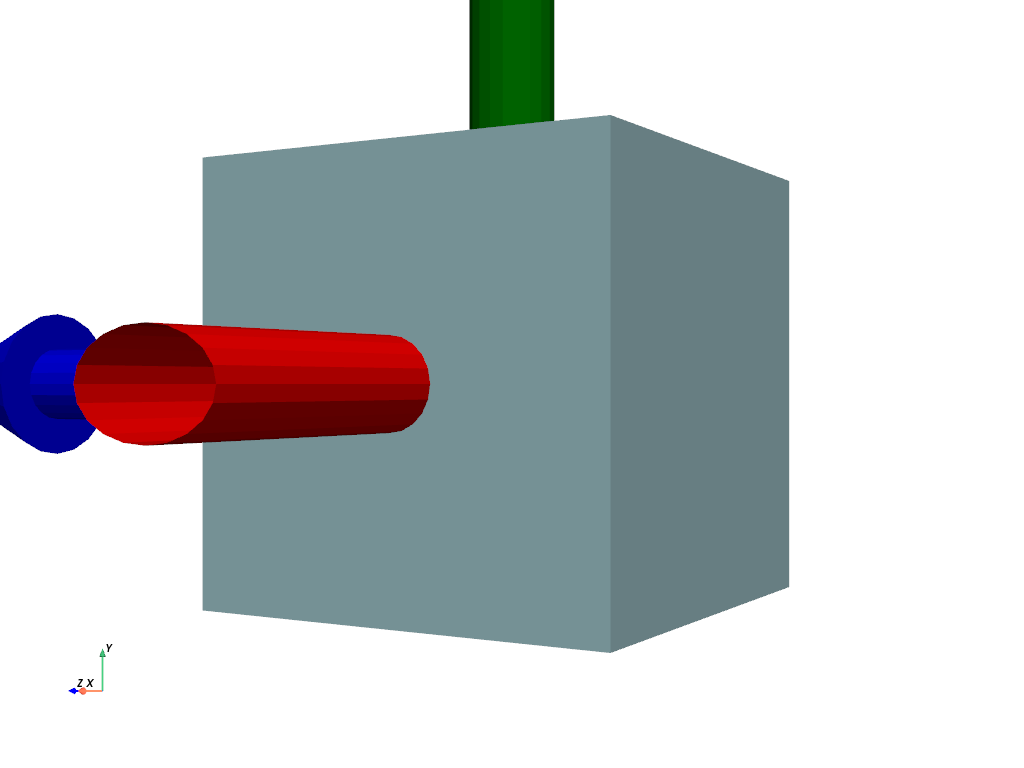

In [17]:
mesh = pv.Cube()
pl = pv.Plotter(off_screen=True)  # Off-screen rendering
pl.add_mesh(mesh, color="lightblue", show_edges=False)
pl.camera_position = 'xy'  # Set static camera view
pl.add_axes()
origin = [0, 0, 0]  # The origin (0, 0, 0)
pl.camera.azimuth = 120.0
# Create arrows along the X, Y, and Z axes
x_arrow = pv.Arrow(start=origin, direction=(1, 0, 0), scale=2)  # X axis, scaled by 2
y_arrow = pv.Arrow(start=origin, direction=(0, 1, 0), scale=2)  # Y axis, scaled by 2
z_arrow = pv.Arrow(start=origin, direction=(0, 0, 1), scale=2)  # Z axis, scaled by 2
# Add arrows (axis vectors) to the plot with different colors
pl.add_mesh(x_arrow, color="red", label="X-axis")
pl.add_mesh(y_arrow, color="green", label="Y-axis")
pl.add_mesh(z_arrow, color="blue", label="Z-axis")
pl.show(jupyter_backend='static')

In [13]:
pl.camera.azimuth
pl.camera.azimuth = 90.0

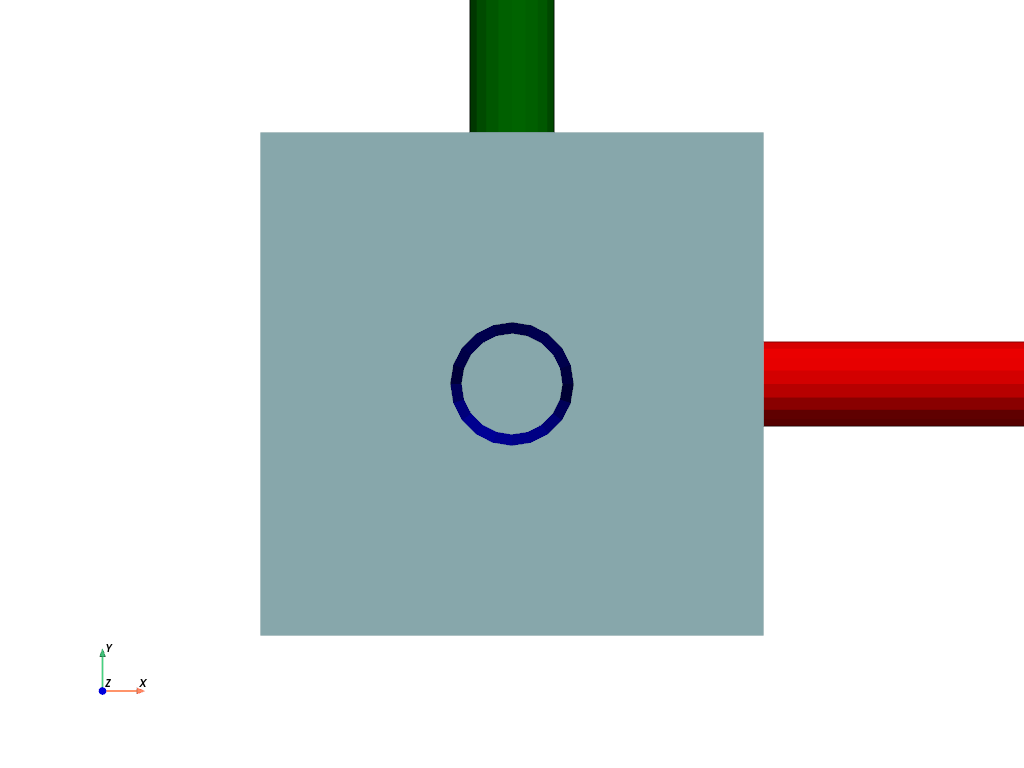

In [14]:
pl.show(jupyter_backend='static')

In [ ]:
# azimuth rotation (about z-axis)
mesh = pv.Cube()
plotter = pv.Plotter(off_screen=True)  # Off-screen rendering
plotter.add_mesh(mesh, color="lightblue", show_edges=False)
plotter.camera_position = 'xy'  # Set static camera view
plotter.add_axes()
origin = [0, 0, 0]  # The origin (0, 0, 0)
l_axis = 5
# Create arrows along the X, Y, and Z axes
x_arrow = pv.Arrow(start=origin, direction=(1, 0, 0), scale=2)  # X axis, scaled by 2
y_arrow = pv.Arrow(start=origin, direction=(0, 1, 0), scale=2)  # Y axis, scaled by 2
z_arrow = pv.Arrow(start=origin, direction=(0, 0, 1), scale=2)  # Z axis, scaled by 2
# Add arrows (axis vectors) to the plot with different colors
plotter.add_mesh(x_arrow, color="red", label="X-axis")
plotter.add_mesh(y_arrow, color="green", label="Y-axis")
plotter.add_mesh(z_arrow, color="blue", label="Z-axis")
plotter.show(jupyter_backend='static')

In [ ]:
# example_meshes = [attr for attr in dir(pv.examples) if callable(getattr(pv.examples, attr))]
# print(example_meshes)
# mesh1 = pv.Cube()

In [ ]:
# Plot original view
# Set up PyVista plotter
plotter = pv.Plotter(off_screen=True)  # Off-screen rendering
plotter.add_mesh(mesh1, color="lightblue", show_edges=False)
# plotter.camera_position = 'xy'  # Set static camera view
plotter.show(jupyter_backend='static')

In [ ]:
# rotate by arbitrary angle 
def random_rotate(mesh):
    """
    Rotate rosette in a random orientation
    TODO:
    - fix bug related to the reliance on model attribute
    """
    rotated = mesh.copy()
    deg_x = np.random.randint(1, 360)
    deg_y = np.random.randint(1, 360)
    deg_z = np.random.randint(1, 360)
    rotated_model = rotated.rotate_x(deg_x, inplace=False)
    rotated_model.rotate_y(deg_y, inplace=True)
    rotated_model.rotate_z(deg_z, inplace=True)
    print(f'x: {deg_x}, y: {deg_y}, z: {deg_z}')
    return rotated_model
mesh2 = random_rotate(mesh1)

# plot
plotter = pv.Plotter(off_screen=True)  # Off-screen rendering
plotter.add_mesh(mesh1, color='red', opacity=0.5)
plotter.add_mesh(mesh2, color="lightblue", show_edges=False)
# plotter.camera_position = 'xy'  # Set static camera view
plotter.show(jupyter_backend='static')

In [ ]:
# rotate again but this time by specified angle of 90 deg
# Define the arbitrary axis of rotation (must be a unit vector)
axis = np.array([0, 0, 1])  # Example: rotation around the diagonal of XY-plane
axis = axis / np.linalg.norm(axis)  # Normalize the axis
# Define the rotation angle (in degrees)
theta = 90  # Rotate theta degrees
# Rotate the mesh
mesh3 = mesh2.rotate_vector(axis, theta, point=(0, 0, 0))  # Rotate about the origin
# plot
plotter = pv.Plotter(off_screen=True)  # Off-screen rendering
# plotter.add_mesh(mesh1, color='red', opacity=0.2)
plotter.add_mesh(mesh2, color='gray', opacity=0.2)
plotter.add_mesh(mesh3, color="lightblue", show_edges=False)
# plotter.add_axes_at_origin()
# plotter.camera_position = 'xy'  # Set static camera view
plotter.show(jupyter_backend='static')